## Load Libraries

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import pandas as pd
from fbprophet import Prophet

## Load Data
Datos de ventas de bebidas alcoholicas. Datos mensuales y son las ventas.



In [112]:
df = pd.read_csv('/content/drive/MyDrive/Python-Prophet-K/Libro1111.csv')

In [ ]:
df.head()

,tiempo,Tareas Realizadas,Suscriptores,dummy
0,05/07/2021,2,3,1
1,06/07/2021,6,3,1
2,07/07/2021,13,3,1
3,08/07/2021,9,3,1
4,09/07/2021,16,3,1


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            50 non-null     datetime64[ns]
 1   y             50 non-null     int64         
 2   suscriptores  50 non-null     int64         
 3   dummy         50 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 KB


### Format the Data
Para asgurarnos que los datos sean fechas, esta libreria requiere que los datos esten de una forma especifica, toca llamarlo dfcolumns =['ds', 'y'] se debe cambiar el nombre de las columnas, por defecto prophet utiliza una frecuencia diaria. 
pd.to_datetime: Se transofrman los datos en tipo fecha.

In [113]:
df.columns = ['ds','y', 'suscriptores', 'dummy']

In [114]:
df['ds'] = pd.to_datetime(df['ds'])

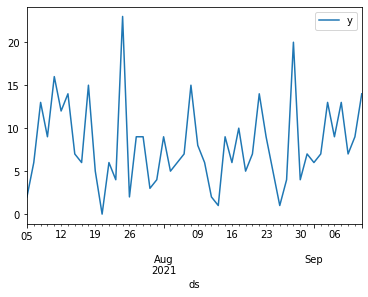

In [160]:
df.plot(x='ds', y = 'y')

## Create and Fit Model


In [145]:
m = Prophet(daily_seasonality=True, weekly_seasonality='auto')
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Prophet(interval_width=0.90) para cambiar la confianza de los pronosticos

## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados
m.make_future_dataframe(periods=24,freq = 'MS')
este método que se llama make_Future_dataframe sobre nuestro modelo m, luego la cantidad de elementos que queremos pronósticar en el futuro, como es mensual colocamos 24, luego especificamos la frecuencia que estamos considerando, porque por defecto estan diario. Aca se cambia a mensual.


In [146]:
future = m.make_future_dataframe(periods=24)

In [147]:
future.head()

,ds
0,2021-07-05
1,2021-07-06
2,2021-07-07
3,2021-07-08
4,2021-07-09


In [148]:
df.head()

,ds,y,suscriptores,dummy
0,2021-07-05,2,3,1
1,2021-07-06,6,3,1
2,2021-07-07,13,3,1
3,2021-07-08,9,3,1
4,2021-07-09,16,3,1


In [149]:
df.tail()

,ds,y,suscriptores,dummy
45,2021-09-06,9,4,0
46,2021-09-07,13,4,0
47,2021-09-08,7,4,0
48,2021-09-09,9,4,0
49,2021-09-10,14,4,0


En futuroesta todo el pasado mas lo dos a nos adicionales

In [150]:
future.tail()

,ds
69,2021-09-30
70,2021-10-01
71,2021-10-02
72,2021-10-03
73,2021-10-04



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [151]:
forecast = m.predict(future)

Yhat son las predicciones

In [152]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-05,0.442558,1.968935,11.524873,0.442558,0.442558,6.343571,6.343571,6.343571,7.441012,7.441012,7.441012,-1.097441,-1.097441,-1.097441,0.0,0.0,0.0,6.786129
1,2021-07-06,0.436729,2.894509,12.409706,0.436729,0.436729,7.247946,7.247946,7.247946,7.441012,7.441012,7.441012,-0.193066,-0.193066,-0.193066,0.0,0.0,0.0,7.684675
2,2021-07-07,0.430900,2.049499,11.255191,0.430900,0.430900,5.957114,5.957114,5.957114,7.441012,7.441012,7.441012,-1.483898,-1.483898,-1.483898,0.0,0.0,0.0,6.388014
3,2021-07-08,0.425071,1.127631,10.717395,0.425071,0.425071,5.464539,5.464539,5.464539,7.441012,7.441012,7.441012,-1.976473,-1.976473,-1.976473,0.0,0.0,0.0,5.889610
4,2021-07-09,0.419242,9.910927,19.359784,0.419242,0.419242,14.052142,14.052142,14.052142,7.441012,7.441012,7.441012,6.611130,6.611130,6.611130,0.0,0.0,0.0,14.471383


In [153]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
69,2021-09-30,-0.064368,0.692780,10.154456,-0.064378,-0.064360,5.464539,5.464539,5.464539,7.441012,7.441012,7.441012,-1.976473,-1.976473,-1.976473,0.0,0.0,0.0,5.400171
70,2021-10-01,-0.070193,9.713663,18.890062,-0.070203,-0.070184,14.052142,14.052142,14.052142,7.441012,7.441012,7.441012,6.611130,6.611130,6.611130,0.0,0.0,0.0,13.981949
71,2021-10-02,-0.076018,1.894573,10.846789,-0.076029,-0.076009,6.510886,6.510886,6.510886,7.441012,7.441012,7.441012,-0.930126,-0.930126,-0.930126,0.0,0.0,0.0,6.434868
72,2021-10-03,-0.081843,1.778106,11.075502,-0.081855,-0.081833,6.510885,6.510885,6.510885,7.441012,7.441012,7.441012,-0.930127,-0.930127,-0.930127,0.0,0.0,0.0,6.429042
73,2021-10-04,-0.087668,1.563953,10.797207,-0.087680,-0.087657,6.343571,6.343571,6.343571,7.441012,7.441012,7.441012,-1.097441,-1.097441,-1.097441,0.0,0.0,0.0,6.255903


Si queremos saber todos los nombres que estan guardados en el pronóstico. y hat, y para el intervalo de confianza yhat lower y yhatupper

In [154]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [155]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
62,2021-09-23,5.440946,1.042258,10.254684
63,2021-09-24,14.022723,9.323987,19.041075
64,2021-09-25,6.475643,1.635479,11.405247
65,2021-09-26,6.469817,1.694070,11.242849
66,2021-09-27,6.296678,1.330370,11.023853
67,2021-09-28,7.195228,2.607520,11.380527
68,2021-09-29,5.898571,1.243334,10.687175
69,2021-09-30,5.400171,0.692780,10.154456
70,2021-10-01,13.981949,9.713663,18.890062
71,2021-10-02,6.434868,1.894573,10.846789


### Graficando los pronósticos


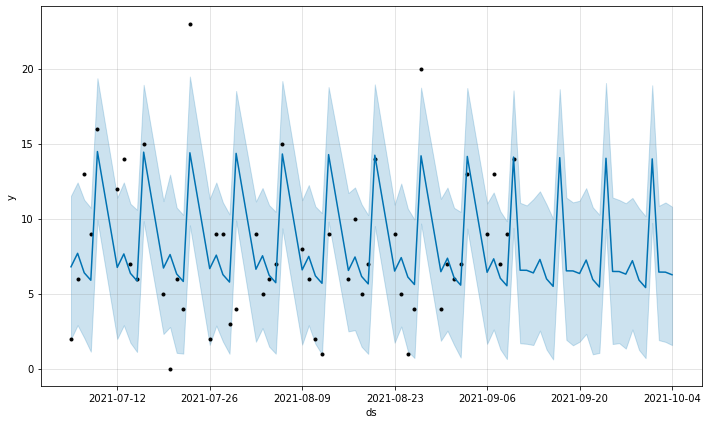

In [156]:
m.plot(forecast);

Los datos son los puntos negros, los del final son el futuro. La linea azul son el pronóstico, para ampliarlo ver la siguiente instrucción.

In [157]:
pd.plotting.register_matplotlib_converters()

(738025.0, 738067.0)

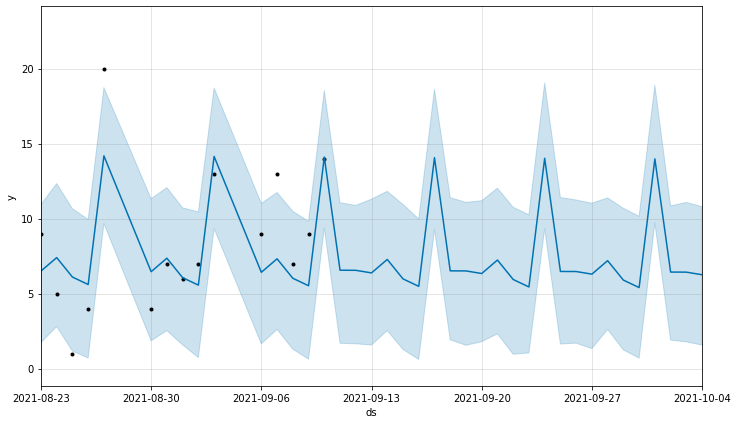

In [158]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2021-08-23','2021-10-04')

Para graficar solamente la predicción:

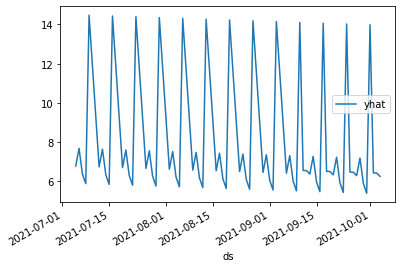

In [142]:
forecast.plot(x='ds',y='yhat')

Se dibuja el componente de tendencia, y componenete de tendencia anual hay un pico anual en Diciembre donde la gente tiende a comprar más alochol

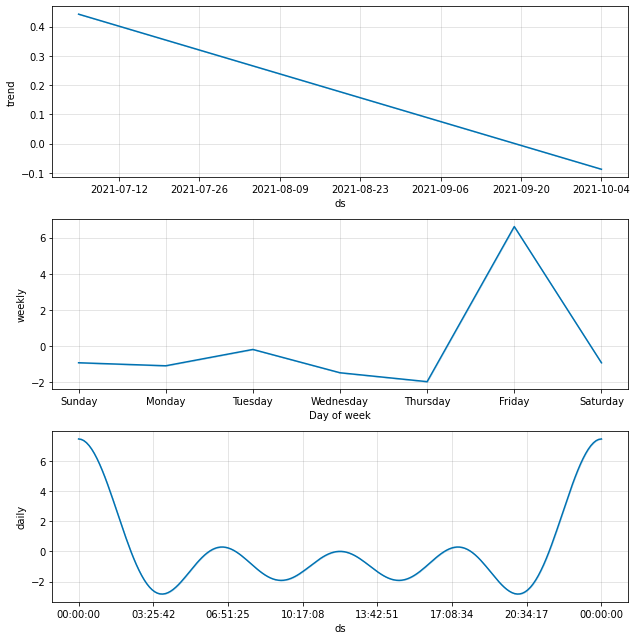

In [159]:
m.plot_components(forecast);


# Para evaluar la habilidad de pronostico en una muestra de entrenamiento:


In [162]:
len(df) # Actualmente tenemos 50 datos

50

In [163]:
train = df.iloc[:40]
test = df.iloc[40:]

In [165]:
m1 =Prophet(daily_seasonality=True)
m1.fit(train)
future = m1.make_future_dataframe(periods=10)
forecast = m1.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [166]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
45,2021-09-02,-2.101178,-1.692999,8.350018,-2.101178,-2.101178,5.833786,5.833786,5.833786,8.1091,8.1091,8.1091,-2.275314,-2.275314,-2.275314,0.0,0.0,0.0,3.732608
46,2021-09-03,-2.145382,8.022161,17.740003,-2.145382,-2.145381,15.252892,15.252892,15.252892,8.1091,8.1091,8.1091,7.143792,7.143792,7.143792,0.0,0.0,0.0,13.107510
47,2021-09-04,-2.189585,-0.193126,9.838969,-2.189585,-2.189585,7.095463,7.095463,7.095463,8.1091,8.1091,8.1091,-1.013637,-1.013637,-1.013637,0.0,0.0,0.0,4.905878
48,2021-09-05,-2.233788,-0.104640,9.714621,-2.233788,-2.233788,7.095462,7.095462,7.095462,8.1091,8.1091,8.1091,-1.013638,-1.013638,-1.013638,0.0,0.0,0.0,4.861674
49,2021-09-06,-2.277992,-0.150465,9.736667,-2.277992,-2.277992,7.201162,7.201162,7.201162,8.1091,8.1091,8.1091,-0.907938,-0.907938,-0.907938,0.0,0.0,0.0,4.923170


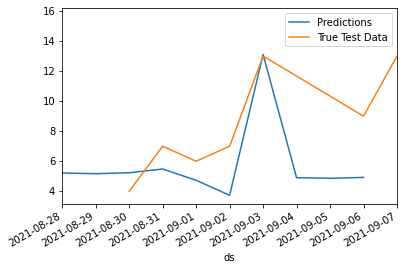

In [174]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predictions', legend= True)
test.plot(x='ds', y = 'y', label = 'True Test Data', legend = True, ax=ax, xlim =('2021-08-28', '2021-09-7'))

In [175]:
from statsmodels.tools.eval_measures import rmse

In [180]:
predictions = forecast.iloc[-10:]['yhat']

In [182]:
predictions

40     5.215302
41     5.171097
42     5.232594
43     5.482591
44     4.732598
45     3.732608
46    13.107510
47     4.905878
48     4.861674
49     4.923170
Name: yhat, dtype: float64

In [181]:
test['y']

40     4
41     7
42     6
43     7
44    13
45     9
46    13
47     7
48     9
49    14
Name: y, dtype: int64

In [183]:
rmse(predictions, test['y'])

4.557632439105338

In [184]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y               8.9
suscriptores    4.0
dummy           0.0
dtype: float64

In [185]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
# INITIAL  Definir 

#PERIOD

# 